In [3]:
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2
from mpmf.utils import *

import matplotlib.pyplot as plt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [2]:
np.random.seed(0)  # Set random seed for reproducibility
T = np.random.rand(100)
m = 5
k = 1
l = 3

In [3]:
df_motif1 = get_top_1_motif(pd.Series(T), m, l, True)
interested_features = [
    c for c in df_motif1.columns if (("idx" not in c) and ("dist" not in c))
]
df_motif1 = df_motif1[interested_features]
df_motif1

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


,top_1_motif_point_after_1,top_1_motif_point_after_2,top_1_motif_point_after_3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
95,0.925597,0.071036,0.087129
96,0.820993,0.097101,0.837945
97,0.666767,0.670638,0.210383
98,0.963663,0.383442,0.791725


In [4]:
df_motif2 = get_top_k_motifs(pd.Series(T), m, k, l, True)
interested_features = [c for c in df_motif2.columns if ("idx" not in c)]
df_motif2 = df_motif2[interested_features]
df_motif2

,top_1_motif_dist,top_1_motif_point_after_1,top_1_motif_point_after_2,top_1_motif_point_after_3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
95,0.918651,0.925597,0.071036,0.087129
96,0.836035,0.820993,0.097101,0.837945
97,0.846294,0.666767,0.670638,0.210383
98,0.635866,0.963663,0.383442,0.791725


In [5]:
results = compute_point_after_average(df_motif2)
results

,average_point_after_1,average_point_after_2,average_point_after_3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
95,0.925597,0.071036,0.087129
96,0.820993,0.097101,0.837945
97,0.666767,0.670638,0.210383
98,0.963663,0.383442,0.791725


In [6]:
results = compute_point_after_average(df_motif2, method="weighted")
results

,weighted_average_point_after_1,weighted_average_point_after_2,weighted_average_point_after_3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
95,0.925597,0.071036,0.087129
96,0.820993,0.097101,0.837945
97,0.666767,0.670638,0.210383
98,0.963663,0.383442,0.791725


In [7]:
import datetime

print(f"This notebook was last run end-to-end on: {datetime.datetime.now()}\n")
###
###
###

This notebook was last run end-to-end on: 2025-08-22 17:59:13.664803



In [69]:
import numpy as np
from stumpy import config, core
import stumpy

np.random.seed(0)
T = np.random.rand(2000)
l = 3
m = 5
r = 2
start_idx = 500
stop_idx = start_idx + m
T_prime = T[start_idx:stop_idx]
T_copy = T.copy()  # Make a copy of T

# Apply exclusion zone AND clear all values to the right of the start index
excl_zone = int(np.ceil(m / config.STUMPY_EXCL_ZONE_DENOM))
# core.apply_exclusion_zone(T_copy, start_idx, excl_zone, np.nan)
T_copy[start_idx - excl_zone - 1 + m :] = np.nan
matches = stumpy.match(T_prime, T_copy, max_matches=1)
print(matches)
T_match = T[(st := matches[0][1]) : st + m]
threshold = matches[0][0] * r
T_center = (stumpy.core.z_norm(T_prime) + stumpy.core.z_norm(T_match)) / 2
distance_profile = stumpy.mass(T_center, T_copy)

[[np.float64(0.2228151726384324) np.int64(398)]]


In [70]:
T_prime, T_match

(array([0.31038083, 0.37303486, 0.52497044, 0.75059502, 0.33350747]),
 array([0.0163285 , 0.18523233, 0.4012595 , 0.92929142, 0.09961493]))

In [71]:
np.linalg.norm(stumpy.core.z_norm(T_prime) - stumpy.core.z_norm(T_match))

np.float64(0.22281517263841702)

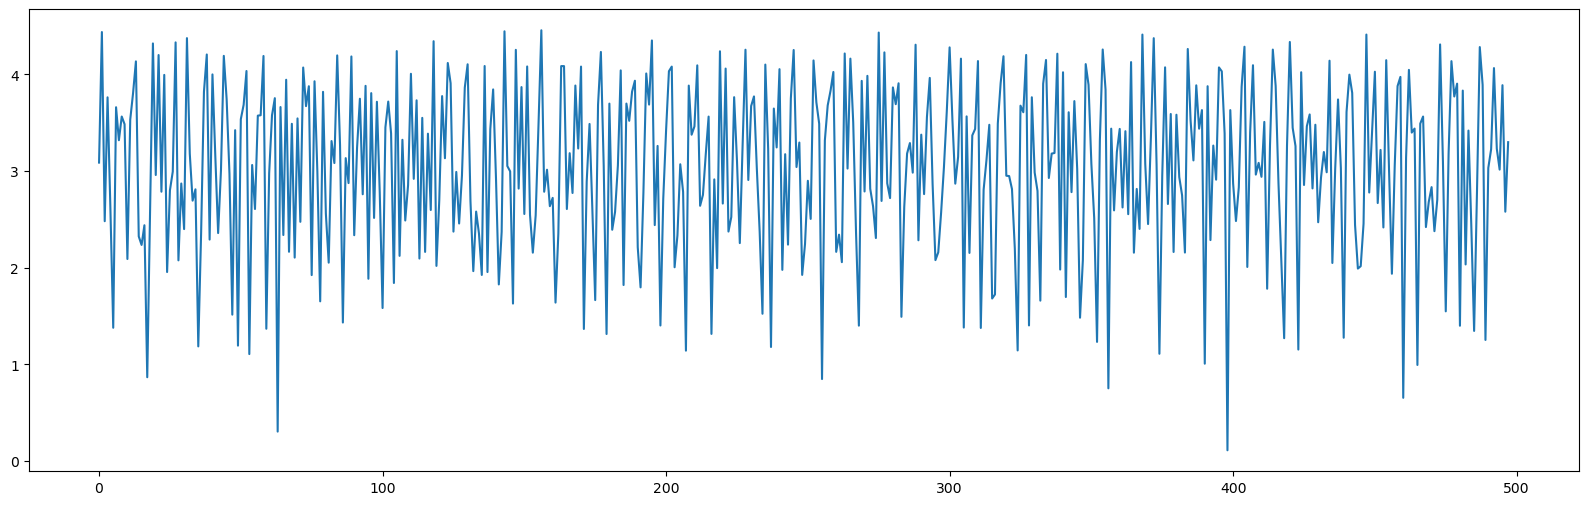

In [72]:
plt.plot(distance_profile)

In [73]:
threshold

np.float64(0.4456303452768648)

In [74]:
valid_indices = np.where(distance_profile < threshold)[0]

In [34]:
valid_indices

array([ 63, 398])

In [75]:
# Ensure we only keep indices where i+m+l <= len(T)
valid_indices = valid_indices[valid_indices + m + l <= len(T)]

In [76]:
# Retrieve the l points after each valid subsequence
family_members = [T[i : i + m] for i in valid_indices]
# family_members = [T[i : i + m + l] for i in valid_indices]

In [77]:
print("Start indices:", valid_indices)
for idx, pts in zip(valid_indices, family_members):
    print(f"After subsequence at {idx}: {pts}")

Start indices: [ 63 398]
After subsequence at 63: [0.13818295 0.19658236 0.36872517 0.82099323 0.09710128]
After subsequence at 398: [0.0163285  0.18523233 0.4012595  0.92929142 0.09961493]


In [78]:
family_members

[array([0.13818295, 0.19658236, 0.36872517, 0.82099323, 0.09710128]),
 array([0.0163285 , 0.18523233, 0.4012595 , 0.92929142, 0.09961493])]

In [79]:
family_members[0]

array([0.13818295, 0.19658236, 0.36872517, 0.82099323, 0.09710128])

In [80]:
family_df = pd.DataFrame(family_members, index=valid_indices)
# family_df.columns = [
#     f"p_{i}" for i in range(m + l) # m + l
# ]  # first m are motif points, last l are points after
family_df

,0,1,2,3,4
63,0.138183,0.196582,0.368725,0.820993,0.097101
398,0.016329,0.185232,0.401260,0.929291,0.099615


In [81]:
family_df = (
    family_df.assign(NaN=np.nan)
    .stack(dropna=False)
    .to_frame()
    .reset_index(drop=True)
    .rename({0: "Family members"}, axis="columns")
)

/var/folders/2w/d1h5t_nn2slf5r75qqdvlt0m0000gn/T/ipykernel_10995/1983461276.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  family_df.assign(NaN=np.nan)


In [82]:
family_df["Family members"]

0     0.138183
1     0.196582
2     0.368725
3     0.820993
4     0.097101
5          NaN
6     0.016329
7     0.185232
8     0.401260
9     0.929291
10    0.099615
11         NaN
Name: Family members, dtype: float64

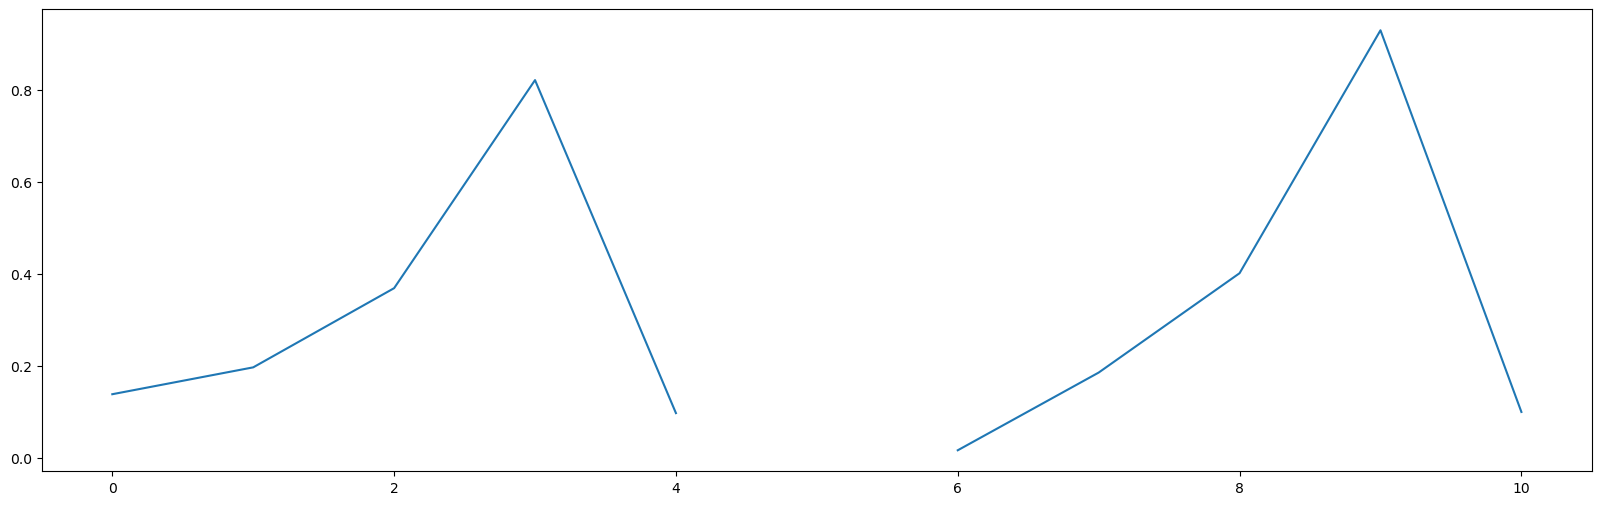

In [83]:
plt.plot(family_df)

In [84]:
m = 5
P_family_family = stumpy.stump(family_df["Family members"], m)[:, 0].astype(float)

In [85]:
P_family_family[P_family_family == np.inf] = np.nan

In [86]:
P_family_family

mparray([0.3071186,       nan,       nan,       nan,       nan,       nan,
         0.3071186,       nan])

In [ ]:
threshold

np.float64(0.4456303452768648)

In [ ]:
start_idx = 50
stop_idx = start_idx + m
T_prime = T[start_idx:stop_idx]
T_copy = T.copy()  # Make a copy of T

In [11]:
# Apply exclusion zone AND clear all values to the right of the start index
excl_zone = int(np.ceil(m / config.STUMPY_EXCL_ZONE_DENOM))
# core.apply_exclusion_zone(T_copy, start_idx, excl_zone, np.nan)
T_copy[start_idx - excl_zone - 1 + m :] = np.nan
matches = stumpy.match(T_prime, T_copy, max_matches=2)
print(matches)

[[np.float64(0.5842216216232013) np.int64(11)]]


In [ ]:
def get_top_k_motif_families(T, m, k=1, r=2, l=1, include_itself=False):
    # https://github.com/stumpy-dev/stumpy/discussions/1093#discussioncomment-14063985

    # print("get_top_k_motif_families")
    top_k_motif_dist = np.full((len(T), k), np.nan)
    top_k_motif_idx = np.full((len(T), k), np.nan)
    top_k_motif_idx_delta = np.full((len(T), k), np.nan)
    top_k_motif_points_after = np.full((len(T), k, l), np.nan)

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        if include_itself:
            first_i_idx = m - 1
        else:
            first_i_idx = m
        for i in range(first_i_idx, len(T)):
            if include_itself:
                stop_idx = i + 1
            else:
                stop_idx = i
            start_idx = stop_idx - m
            T_prime = T[start_idx:stop_idx]
            # print(f"i={i}, start_idx={start_idx}, stop_idx={stop_idx}, T_prime={T_prime}")
            T_copy = T.copy()  # Make a copy of T to keep the original intact
            # Apply exclusion zone
            # https://github.com/stumpy-dev/stumpy/blob/534488d0b84f2bc20d529e6c46daf62c497f5f2b/stumpy/core.py#L2078
            excl_zone = int(np.ceil(m / config.STUMPY_EXCL_ZONE_DENOM))
            # Clear all values to the right of the start index
            T_copy[start_idx - excl_zone - 1 + m :] = np.nan
            matches = stumpy.match(T_prime, T_copy, max_matches=1)

            # print(f"i={i}, matches={matches}")
            for kk in range(len(matches)):
                top_k_motif_dist[i, kk] = matches[kk, 0]
                top_k_motif_idx[i, kk] = matches[kk, 1]
                top_k_motif_idx_delta[i, kk] = start_idx - top_k_motif_idx[i, kk]
                top_k_motif_points_after[i, kk, :] = T[
                    matches[kk, 1] + m : matches[kk, 1] + m + l
                ]
    top_k_motif_dist_cols = {
        f"top_{kk+1}_motif_dist": top_k_motif_dist[:, kk] for kk in range(k)
    }
    top_k_motif_idx_cols = {
        f"top_{kk+1}_motif_idx": top_k_motif_idx[:, kk] for kk in range(k)
    }
    top_k_motif_idx_delta_cols = {
        f"top_{kk+1}_motif_idx_delta": top_k_motif_idx_delta[:, kk] for kk in range(k)
    }
    top_k_motif_point_after_cols = {}
    for kk in range(k):
        top_k_motif_point_after_cols.update(
            {
                f"top_{kk+1}_motif_point_after_{ll+1}": top_k_motif_points_after[
                    :, kk, ll
                ]
                for ll in range(l)
            }
        )
    df_motif = pd.DataFrame(
        {
            **top_k_motif_dist_cols,
            **top_k_motif_idx_cols,
            **top_k_motif_idx_delta_cols,
            **top_k_motif_point_after_cols,
        }
    )
    return df_motif